<a href="https://colab.research.google.com/github/Popular1319/uber-driver-ltv/blob/main/GS_Uber_Driver's_LTV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read all the data sets and save them in different pandas dataframe
driver_id = pd.read_csv('/content/drive/MyDrive/Growth School/Bibek_GS_Assignments/Uber Lifetime Value/driver_ids.csv')
ride_ids = pd.read_csv('/content/drive/MyDrive/Growth School/Bibek_GS_Assignments/Uber Lifetime Value/ride_ids.csv')
ride_times = pd.read_csv('/content/drive/MyDrive/Growth School/Bibek_GS_Assignments/Uber Lifetime Value/ride_timestamps.csv')

In [3]:
# pivoting the ride_session where all the ride realated timestamp dta is present to get a proper reorganised table across ride_id
ride_session = ride_times.pivot(columns = 'event', index = 'ride_id', values = 'timestamp')
ride_session

event,accepted_at,arrived_at,dropped_off_at,picked_up_at,requested_at
ride_id,,,,,
00003037a262d9ee40e61b5c0718f7f0,2016-06-13 09:39:51,2016-06-13 09:44:31,2016-06-13 10:03:05,2016-06-13 09:44:33,2016-06-13 09:39:19
00005eae40882760d675da5effb89ae3,2016-05-14 05:23:25,2016-05-14 05:26:17,2016-05-14 05:34:17,2016-05-14 05:26:18,2016-05-14 05:23:21
000061d42cf29f73b591041d9a1b2973,2016-05-16 15:43:14,2016-05-16 15:47:29,2016-05-16 15:54:18,2016-05-16 15:47:32,2016-05-16 15:43:09
00006efeb0d5e3ccad7d921ddeee9900,2016-05-11 19:29:43,2016-05-11 19:35:11,2016-05-11 19:40:47,2016-05-11 19:35:15,2016-05-11 19:29:36
0000d9b24d8ccdd991b76258e616fa01,2016-04-26 18:12:15,2016-04-26 18:16:52,2016-04-26 18:24:14,2016-04-26 18:16:55,2016-04-26 18:11:38
...,...,...,...,...,...
fffebb46effb90ce758fdff68b569355,2016-06-16 09:57:12,2016-06-16 09:58:54,2016-06-16 10:15:08,2016-06-16 09:58:57,2016-06-16 09:57:07
ffff9c38173ddfa17bdd115c463e329f,2016-06-03 18:34:07,2016-06-03 18:35:20,2016-06-03 18:50:08,2016-06-03 18:35:22,2016-06-03 18:34:00
ffff9e431f7fade54b2550ac19ab6e64,2016-06-12 04:00:10,2016-06-12 04:04:35,2016-06-12 04:15:42,2016-06-12 04:04:37,2016-06-12 04:00:10


In [4]:
# joining ride_id where all the ride related data is available and ride_session where all the ride related timestamps are present
ride_info = pd.merge(ride_ids, ride_session, on = 'ride_id')
ride_info

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,accepted_at,arrived_at,dropped_off_at,picked_up_at,requested_at
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,2016-04-23 02:14:15,2016-04-23 02:16:36,2016-04-23 02:22:07,2016-04-23 02:16:40,2016-04-23 02:13:50
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,2016-03-29 19:00:52,2016-03-29 19:03:57,2016-03-29 19:17:30,2016-03-29 19:04:01,2016-03-29 19:00:49
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,2016-06-21 11:56:39,2016-06-21 12:01:32,2016-06-21 12:11:07,2016-06-21 12:01:35,2016-06-21 11:56:31
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25,2016-05-19 09:15:33,2016-05-19 09:18:20,2016-05-19 10:13:58,2016-05-19 09:18:20,2016-05-19 09:15:29
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100,2016-04-20 22:05:32,2016-04-20 22:07:03,2016-04-20 22:20:45,2016-04-20 22:07:02,2016-04-20 22:05:30
...,...,...,...,...,...,...,...,...,...,...
184814,ffff51a71f2f185ec5e97d59dbcd7a78,fc717192b3512767269ff5a54b97af05,10127,1336,0,2016-06-18 01:15:52,2016-06-18 01:21:11,2016-06-18 01:43:30,2016-06-18 01:21:14,2016-06-18 01:14:52
184815,ffff51a71f2f185ec5e97d59dbcd7a78,fd6fa5f9265d2cf83936ead663f9e0e7,1908,445,0,2016-06-23 23:52:08,2016-06-23 23:59:04,2016-06-24 00:06:33,2016-06-23 23:59:08,2016-06-23 23:51:55
184816,ffff51a71f2f185ec5e97d59dbcd7a78,fe0857c43025264d337dfe1d8463e503,4039,875,0,2016-05-31 19:26:42,2016-05-31 19:29:08,2016-05-31 19:43:46,2016-05-31 19:29:11,2016-05-31 19:26:34
184817,ffff51a71f2f185ec5e97d59dbcd7a78,ff0db0ca4557bf5b05b4da6f660a1ac1,4760,777,0,2016-05-15 00:51:59,2016-05-15 00:52:05,2016-05-15 01:05:04,2016-05-15 00:52:07,2016-05-15 00:51:53


In [5]:
# creating a column to get the ride distance in miles
ride_info['ride_dist_in_mile'] = ride_info['ride_distance']*0.000621371

# creating a column to get ride duration in minutes
ride_info['ride_duration_in_minute'] = ride_info['ride_duration']/60
ride_info

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,accepted_at,arrived_at,dropped_off_at,picked_up_at,requested_at,ride_dist_in_mile,ride_duration_in_minute
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,2016-04-23 02:14:15,2016-04-23 02:16:36,2016-04-23 02:22:07,2016-04-23 02:16:40,2016-04-23 02:13:50,1.125303,5.450000
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,2016-03-29 19:00:52,2016-03-29 19:03:57,2016-03-29 19:17:30,2016-03-29 19:04:01,2016-03-29 19:00:49,2.089049,13.483333
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,2016-06-21 11:56:39,2016-06-21 12:01:32,2016-06-21 12:11:07,2016-06-21 12:01:35,2016-06-21 11:56:31,2.039340,9.533333
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25,2016-05-19 09:15:33,2016-05-19 09:18:20,2016-05-19 10:13:58,2016-05-19 09:18:20,2016-05-19 09:15:29,40.564963,55.633333
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100,2016-04-20 22:05:32,2016-04-20 22:07:03,2016-04-20 22:20:45,2016-04-20 22:07:02,2016-04-20 22:05:30,2.556942,13.716667
...,...,...,...,...,...,...,...,...,...,...,...,...
184814,ffff51a71f2f185ec5e97d59dbcd7a78,fc717192b3512767269ff5a54b97af05,10127,1336,0,2016-06-18 01:15:52,2016-06-18 01:21:11,2016-06-18 01:43:30,2016-06-18 01:21:14,2016-06-18 01:14:52,6.292624,22.266667
184815,ffff51a71f2f185ec5e97d59dbcd7a78,fd6fa5f9265d2cf83936ead663f9e0e7,1908,445,0,2016-06-23 23:52:08,2016-06-23 23:59:04,2016-06-24 00:06:33,2016-06-23 23:59:08,2016-06-23 23:51:55,1.185576,7.416667
184816,ffff51a71f2f185ec5e97d59dbcd7a78,fe0857c43025264d337dfe1d8463e503,4039,875,0,2016-05-31 19:26:42,2016-05-31 19:29:08,2016-05-31 19:43:46,2016-05-31 19:29:11,2016-05-31 19:26:34,2.509717,14.583333
184817,ffff51a71f2f185ec5e97d59dbcd7a78,ff0db0ca4557bf5b05b4da6f660a1ac1,4760,777,0,2016-05-15 00:51:59,2016-05-15 00:52:05,2016-05-15 01:05:04,2016-05-15 00:52:07,2016-05-15 00:51:53,2.957726,12.950000


In [6]:
# creating a new column to add payment received after each ride

ride_info['payment_received'] = 2 + 1.15*ride_info['ride_dist_in_mile'] + 0.22*ride_info['ride_duration_in_minute'] + 1.75
ride_info

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,accepted_at,arrived_at,dropped_off_at,picked_up_at,requested_at,ride_dist_in_mile,ride_duration_in_minute,payment_received
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,2016-04-23 02:14:15,2016-04-23 02:16:36,2016-04-23 02:22:07,2016-04-23 02:16:40,2016-04-23 02:13:50,1.125303,5.450000,6.243098
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,2016-03-29 19:00:52,2016-03-29 19:03:57,2016-03-29 19:17:30,2016-03-29 19:04:01,2016-03-29 19:00:49,2.089049,13.483333,9.118740
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,2016-06-21 11:56:39,2016-06-21 12:01:32,2016-06-21 12:11:07,2016-06-21 12:01:35,2016-06-21 11:56:31,2.039340,9.533333,8.192574
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25,2016-05-19 09:15:33,2016-05-19 09:18:20,2016-05-19 10:13:58,2016-05-19 09:18:20,2016-05-19 09:15:29,40.564963,55.633333,62.639041
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100,2016-04-20 22:05:32,2016-04-20 22:07:03,2016-04-20 22:20:45,2016-04-20 22:07:02,2016-04-20 22:05:30,2.556942,13.716667,9.708150
...,...,...,...,...,...,...,...,...,...,...,...,...,...
184814,ffff51a71f2f185ec5e97d59dbcd7a78,fc717192b3512767269ff5a54b97af05,10127,1336,0,2016-06-18 01:15:52,2016-06-18 01:21:11,2016-06-18 01:43:30,2016-06-18 01:21:14,2016-06-18 01:14:52,6.292624,22.266667,15.885184
184815,ffff51a71f2f185ec5e97d59dbcd7a78,fd6fa5f9265d2cf83936ead663f9e0e7,1908,445,0,2016-06-23 23:52:08,2016-06-23 23:59:04,2016-06-24 00:06:33,2016-06-23 23:59:08,2016-06-23 23:51:55,1.185576,7.416667,6.745079
184816,ffff51a71f2f185ec5e97d59dbcd7a78,fe0857c43025264d337dfe1d8463e503,4039,875,0,2016-05-31 19:26:42,2016-05-31 19:29:08,2016-05-31 19:43:46,2016-05-31 19:29:11,2016-05-31 19:26:34,2.509717,14.583333,9.844508
184817,ffff51a71f2f185ec5e97d59dbcd7a78,ff0db0ca4557bf5b05b4da6f660a1ac1,4760,777,0,2016-05-15 00:51:59,2016-05-15 00:52:05,2016-05-15 01:05:04,2016-05-15 00:52:07,2016-05-15 00:51:53,2.957726,12.950000,10.000385


In [7]:
# checking for the payments lesser than 5$
ride_info[ride_info['payment_received']<5]['payment_received']

127       4.864212
158       4.870992
218       4.752805
303       4.904255
378       4.962895
            ...   
184452    4.057366
184507    4.673067
184703    4.742917
184737    4.450673
184803    4.814098
Name: payment_received, Length: 1965, dtype: float64

In [8]:
# checking for the payments greater than 400$
ride_info[ride_info['payment_received']>400]['payment_received']

1921    625.003359
Name: payment_received, dtype: float64

In [9]:
# changing all the payments which are lesser than 5 and greater than 400 as 5 and 400 respectively
ride_info['final_payment'] = ride_info['payment_received'].apply(lambda x:5 if x<5 else x)
ride_info['final_payment'] = ride_info['payment_received'].apply(lambda x:400 if x>400 else x)
ride_info

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,accepted_at,arrived_at,dropped_off_at,picked_up_at,requested_at,ride_dist_in_mile,ride_duration_in_minute,payment_received,final_payment
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,2016-04-23 02:14:15,2016-04-23 02:16:36,2016-04-23 02:22:07,2016-04-23 02:16:40,2016-04-23 02:13:50,1.125303,5.450000,6.243098,6.243098
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,2016-03-29 19:00:52,2016-03-29 19:03:57,2016-03-29 19:17:30,2016-03-29 19:04:01,2016-03-29 19:00:49,2.089049,13.483333,9.118740,9.118740
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,2016-06-21 11:56:39,2016-06-21 12:01:32,2016-06-21 12:11:07,2016-06-21 12:01:35,2016-06-21 11:56:31,2.039340,9.533333,8.192574,8.192574
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25,2016-05-19 09:15:33,2016-05-19 09:18:20,2016-05-19 10:13:58,2016-05-19 09:18:20,2016-05-19 09:15:29,40.564963,55.633333,62.639041,62.639041
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100,2016-04-20 22:05:32,2016-04-20 22:07:03,2016-04-20 22:20:45,2016-04-20 22:07:02,2016-04-20 22:05:30,2.556942,13.716667,9.708150,9.708150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184814,ffff51a71f2f185ec5e97d59dbcd7a78,fc717192b3512767269ff5a54b97af05,10127,1336,0,2016-06-18 01:15:52,2016-06-18 01:21:11,2016-06-18 01:43:30,2016-06-18 01:21:14,2016-06-18 01:14:52,6.292624,22.266667,15.885184,15.885184
184815,ffff51a71f2f185ec5e97d59dbcd7a78,fd6fa5f9265d2cf83936ead663f9e0e7,1908,445,0,2016-06-23 23:52:08,2016-06-23 23:59:04,2016-06-24 00:06:33,2016-06-23 23:59:08,2016-06-23 23:51:55,1.185576,7.416667,6.745079,6.745079
184816,ffff51a71f2f185ec5e97d59dbcd7a78,fe0857c43025264d337dfe1d8463e503,4039,875,0,2016-05-31 19:26:42,2016-05-31 19:29:08,2016-05-31 19:43:46,2016-05-31 19:29:11,2016-05-31 19:26:34,2.509717,14.583333,9.844508,9.844508
184817,ffff51a71f2f185ec5e97d59dbcd7a78,ff0db0ca4557bf5b05b4da6f660a1ac1,4760,777,0,2016-05-15 00:51:59,2016-05-15 00:52:05,2016-05-15 01:05:04,2016-05-15 00:52:07,2016-05-15 00:51:53,2.957726,12.950000,10.000385,10.000385


In [10]:
ride_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184819 entries, 0 to 184818
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   driver_id                184819 non-null  object 
 1   ride_id                  184819 non-null  object 
 2   ride_distance            184819 non-null  int64  
 3   ride_duration            184819 non-null  int64  
 4   ride_prime_time          184819 non-null  int64  
 5   accepted_at              184819 non-null  object 
 6   arrived_at               184818 non-null  object 
 7   dropped_off_at           184819 non-null  object 
 8   picked_up_at             184819 non-null  object 
 9   requested_at             184819 non-null  object 
 10  ride_dist_in_mile        184819 non-null  float64
 11  ride_duration_in_minute  184819 non-null  float64
 12  payment_received         184819 non-null  float64
 13  final_payment            184819 non-null  float64
dtypes: f

In [11]:
# changing the format of timestamp from string to datetime

ride_info['accepted_at'] = pd.to_datetime(ride_info['accepted_at'], format = '%Y-%m-%d %H:%M:%S')
ride_info['arrived_at'] = pd.to_datetime(ride_info['arrived_at'], format = '%Y-%m-%d %H:%M:%S')
ride_info['dropped_off_at'] = pd.to_datetime(ride_info['dropped_off_at'], format = '%Y-%m-%d %H:%M:%S')
ride_info['picked_up_at'] = pd.to_datetime(ride_info['picked_up_at'], format = '%Y-%m-%d %H:%M:%S')
ride_info['requested_at'] = pd.to_datetime(ride_info['requested_at'], format = '%Y-%m-%d %H:%M:%S')
ride_info

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,accepted_at,arrived_at,dropped_off_at,picked_up_at,requested_at,ride_dist_in_mile,ride_duration_in_minute,payment_received,final_payment
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,2016-04-23 02:14:15,2016-04-23 02:16:36,2016-04-23 02:22:07,2016-04-23 02:16:40,2016-04-23 02:13:50,1.125303,5.450000,6.243098,6.243098
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,2016-03-29 19:00:52,2016-03-29 19:03:57,2016-03-29 19:17:30,2016-03-29 19:04:01,2016-03-29 19:00:49,2.089049,13.483333,9.118740,9.118740
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,2016-06-21 11:56:39,2016-06-21 12:01:32,2016-06-21 12:11:07,2016-06-21 12:01:35,2016-06-21 11:56:31,2.039340,9.533333,8.192574,8.192574
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25,2016-05-19 09:15:33,2016-05-19 09:18:20,2016-05-19 10:13:58,2016-05-19 09:18:20,2016-05-19 09:15:29,40.564963,55.633333,62.639041,62.639041
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100,2016-04-20 22:05:32,2016-04-20 22:07:03,2016-04-20 22:20:45,2016-04-20 22:07:02,2016-04-20 22:05:30,2.556942,13.716667,9.708150,9.708150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184814,ffff51a71f2f185ec5e97d59dbcd7a78,fc717192b3512767269ff5a54b97af05,10127,1336,0,2016-06-18 01:15:52,2016-06-18 01:21:11,2016-06-18 01:43:30,2016-06-18 01:21:14,2016-06-18 01:14:52,6.292624,22.266667,15.885184,15.885184
184815,ffff51a71f2f185ec5e97d59dbcd7a78,fd6fa5f9265d2cf83936ead663f9e0e7,1908,445,0,2016-06-23 23:52:08,2016-06-23 23:59:04,2016-06-24 00:06:33,2016-06-23 23:59:08,2016-06-23 23:51:55,1.185576,7.416667,6.745079,6.745079
184816,ffff51a71f2f185ec5e97d59dbcd7a78,fe0857c43025264d337dfe1d8463e503,4039,875,0,2016-05-31 19:26:42,2016-05-31 19:29:08,2016-05-31 19:43:46,2016-05-31 19:29:11,2016-05-31 19:26:34,2.509717,14.583333,9.844508,9.844508
184817,ffff51a71f2f185ec5e97d59dbcd7a78,ff0db0ca4557bf5b05b4da6f660a1ac1,4760,777,0,2016-05-15 00:51:59,2016-05-15 00:52:05,2016-05-15 01:05:04,2016-05-15 00:52:07,2016-05-15 00:51:53,2.957726,12.950000,10.000385,10.000385


In [12]:
# This is the table sorted by ride_id and consists of relavent data for each ride
# Final table to perform our further analysis
ride_info['acceptance_time'] = (ride_info['accepted_at'] - ride_info['requested_at']).dt.total_seconds()
ride_info

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,accepted_at,arrived_at,dropped_off_at,picked_up_at,requested_at,ride_dist_in_mile,ride_duration_in_minute,payment_received,final_payment,acceptance_time
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,2016-04-23 02:14:15,2016-04-23 02:16:36,2016-04-23 02:22:07,2016-04-23 02:16:40,2016-04-23 02:13:50,1.125303,5.450000,6.243098,6.243098,25.0
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,2016-03-29 19:00:52,2016-03-29 19:03:57,2016-03-29 19:17:30,2016-03-29 19:04:01,2016-03-29 19:00:49,2.089049,13.483333,9.118740,9.118740,3.0
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,2016-06-21 11:56:39,2016-06-21 12:01:32,2016-06-21 12:11:07,2016-06-21 12:01:35,2016-06-21 11:56:31,2.039340,9.533333,8.192574,8.192574,8.0
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25,2016-05-19 09:15:33,2016-05-19 09:18:20,2016-05-19 10:13:58,2016-05-19 09:18:20,2016-05-19 09:15:29,40.564963,55.633333,62.639041,62.639041,4.0
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100,2016-04-20 22:05:32,2016-04-20 22:07:03,2016-04-20 22:20:45,2016-04-20 22:07:02,2016-04-20 22:05:30,2.556942,13.716667,9.708150,9.708150,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184814,ffff51a71f2f185ec5e97d59dbcd7a78,fc717192b3512767269ff5a54b97af05,10127,1336,0,2016-06-18 01:15:52,2016-06-18 01:21:11,2016-06-18 01:43:30,2016-06-18 01:21:14,2016-06-18 01:14:52,6.292624,22.266667,15.885184,15.885184,60.0
184815,ffff51a71f2f185ec5e97d59dbcd7a78,fd6fa5f9265d2cf83936ead663f9e0e7,1908,445,0,2016-06-23 23:52:08,2016-06-23 23:59:04,2016-06-24 00:06:33,2016-06-23 23:59:08,2016-06-23 23:51:55,1.185576,7.416667,6.745079,6.745079,13.0
184816,ffff51a71f2f185ec5e97d59dbcd7a78,fe0857c43025264d337dfe1d8463e503,4039,875,0,2016-05-31 19:26:42,2016-05-31 19:29:08,2016-05-31 19:43:46,2016-05-31 19:29:11,2016-05-31 19:26:34,2.509717,14.583333,9.844508,9.844508,8.0
184817,ffff51a71f2f185ec5e97d59dbcd7a78,ff0db0ca4557bf5b05b4da6f660a1ac1,4760,777,0,2016-05-15 00:51:59,2016-05-15 00:52:05,2016-05-15 01:05:04,2016-05-15 00:52:07,2016-05-15 00:51:53,2.957726,12.950000,10.000385,10.000385,6.0


In [13]:
# divide ride distance to 3 categories (Short ride, medium ride, long ride) dependant on ride_dist_in_mile column (mile)
ride_info["ride_length"] = np.where(ride_info["ride_dist_in_mile"] > ride_info['ride_dist_in_mile'].quantile(0.33), (np.where(ride_info["ride_dist_in_mile"] < ride_info["ride_dist_in_mile"].quantile(0.66), "med_ride", "long_ride")), "short_ride")
ride_info

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,accepted_at,arrived_at,dropped_off_at,picked_up_at,requested_at,ride_dist_in_mile,ride_duration_in_minute,payment_received,final_payment,acceptance_time,ride_length
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,2016-04-23 02:14:15,2016-04-23 02:16:36,2016-04-23 02:22:07,2016-04-23 02:16:40,2016-04-23 02:13:50,1.125303,5.450000,6.243098,6.243098,25.0,short_ride
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,2016-03-29 19:00:52,2016-03-29 19:03:57,2016-03-29 19:17:30,2016-03-29 19:04:01,2016-03-29 19:00:49,2.089049,13.483333,9.118740,9.118740,3.0,med_ride
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,2016-06-21 11:56:39,2016-06-21 12:01:32,2016-06-21 12:11:07,2016-06-21 12:01:35,2016-06-21 11:56:31,2.039340,9.533333,8.192574,8.192574,8.0,med_ride
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25,2016-05-19 09:15:33,2016-05-19 09:18:20,2016-05-19 10:13:58,2016-05-19 09:18:20,2016-05-19 09:15:29,40.564963,55.633333,62.639041,62.639041,4.0,long_ride
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100,2016-04-20 22:05:32,2016-04-20 22:07:03,2016-04-20 22:20:45,2016-04-20 22:07:02,2016-04-20 22:05:30,2.556942,13.716667,9.708150,9.708150,2.0,med_ride
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184814,ffff51a71f2f185ec5e97d59dbcd7a78,fc717192b3512767269ff5a54b97af05,10127,1336,0,2016-06-18 01:15:52,2016-06-18 01:21:11,2016-06-18 01:43:30,2016-06-18 01:21:14,2016-06-18 01:14:52,6.292624,22.266667,15.885184,15.885184,60.0,long_ride
184815,ffff51a71f2f185ec5e97d59dbcd7a78,fd6fa5f9265d2cf83936ead663f9e0e7,1908,445,0,2016-06-23 23:52:08,2016-06-23 23:59:04,2016-06-24 00:06:33,2016-06-23 23:59:08,2016-06-23 23:51:55,1.185576,7.416667,6.745079,6.745079,13.0,short_ride
184816,ffff51a71f2f185ec5e97d59dbcd7a78,fe0857c43025264d337dfe1d8463e503,4039,875,0,2016-05-31 19:26:42,2016-05-31 19:29:08,2016-05-31 19:43:46,2016-05-31 19:29:11,2016-05-31 19:26:34,2.509717,14.583333,9.844508,9.844508,8.0,med_ride
184817,ffff51a71f2f185ec5e97d59dbcd7a78,ff0db0ca4557bf5b05b4da6f660a1ac1,4760,777,0,2016-05-15 00:51:59,2016-05-15 00:52:05,2016-05-15 01:05:04,2016-05-15 00:52:07,2016-05-15 00:51:53,2.957726,12.950000,10.000385,10.000385,6.0,med_ride


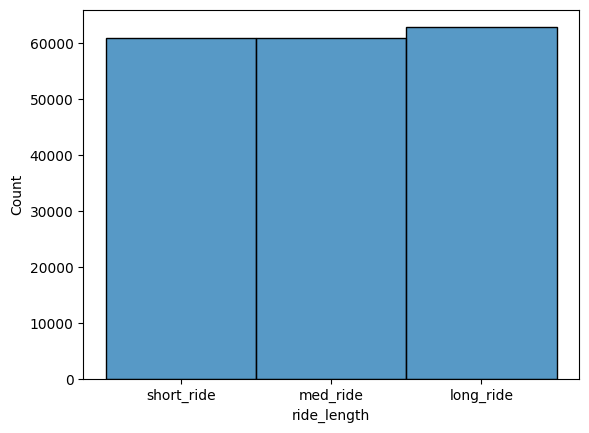

In [14]:
# histogram of ride length categories
sns.histplot(ride_info["ride_length"])
plt.show()

# **1. Life Time Value of Uber driver**

In [15]:
# taking the required columns from the ride_info dataFrame
ltv_uber_driver = ride_info[['driver_id','ride_dist_in_mile','final_payment','ride_duration_in_minute']]
ltv_uber_driver

,driver_id,ride_dist_in_mile,final_payment,ride_duration_in_minute
0,002be0ffdc997bd5c50703158b7c2491,1.125303,6.243098,5.450000
1,002be0ffdc997bd5c50703158b7c2491,2.089049,9.118740,13.483333
2,002be0ffdc997bd5c50703158b7c2491,2.039340,8.192574,9.533333
3,002be0ffdc997bd5c50703158b7c2491,40.564963,62.639041,55.633333
4,002be0ffdc997bd5c50703158b7c2491,2.556942,9.708150,13.716667
...,...,...,...,...
184814,ffff51a71f2f185ec5e97d59dbcd7a78,6.292624,15.885184,22.266667
184815,ffff51a71f2f185ec5e97d59dbcd7a78,1.185576,6.745079,7.416667
184816,ffff51a71f2f185ec5e97d59dbcd7a78,2.509717,9.844508,14.583333
184817,ffff51a71f2f185ec5e97d59dbcd7a78,2.957726,10.000385,12.950000


In [16]:
ltv_uber_driver.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184819 entries, 0 to 184818
Data columns (total 4 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   driver_id                184819 non-null  object 
 1   ride_dist_in_mile        184819 non-null  float64
 2   final_payment            184819 non-null  float64
 3   ride_duration_in_minute  184819 non-null  float64
dtypes: float64(3), object(1)
memory usage: 7.1+ MB


In [17]:
# chaning the index of the ltv_uber_driver to driver_id
ltv_uber_driver.set_index('driver_id',inplace = True)
ltv_uber_driver

,ride_dist_in_mile,final_payment,ride_duration_in_minute
driver_id,,,
002be0ffdc997bd5c50703158b7c2491,1.125303,6.243098,5.450000
002be0ffdc997bd5c50703158b7c2491,2.089049,9.118740,13.483333
002be0ffdc997bd5c50703158b7c2491,2.039340,8.192574,9.533333
002be0ffdc997bd5c50703158b7c2491,40.564963,62.639041,55.633333
002be0ffdc997bd5c50703158b7c2491,2.556942,9.708150,13.716667
...,...,...,...
ffff51a71f2f185ec5e97d59dbcd7a78,6.292624,15.885184,22.266667
ffff51a71f2f185ec5e97d59dbcd7a78,1.185576,6.745079,7.416667
ffff51a71f2f185ec5e97d59dbcd7a78,2.509717,9.844508,14.583333


In [18]:
# LTV and total ride duration in minutes of drivers sorted with respect to driver_id

ltv_uber_driver.groupby('driver_id').sum()

,ride_dist_in_mile,final_payment,ride_duration_in_minute
driver_id,,,
002be0ffdc997bd5c50703158b7c2491,1081.363873,3093.524454,3687.300000
007f0389f9c7b03ef97098422f902e62,73.030355,275.390575,341.616667
011e5c5dfc5c2c92501b8b24d47509bc,167.554554,427.272737,486.750000
0152a2f305e71d26cc964f8d4411add9,914.185249,2407.473369,2908.683333
01674381af7edd264113d4e6ed55ecda,1940.941796,4948.957399,5957.383333
...,...,...,...
ff419a3476e21e269e340b5f1f05414e,1244.233290,3241.497617,4105.133333
ff714a67ba8c6a108261cd81e3b77f3a,1761.440763,5466.877544,7374.866667
fff482c704d36a1afe8b8978d5486283,108.363374,357.408880,461.550000


# **2. What are the main factors that affect a driver's lifetime value?**

In [19]:
## ride_info['payment_received'] = 2 + 1.15*ride_info['ride_dist_in_mile'] + 0.22*ride_info['ride_duration_in_minute'] + 1.75

In [20]:
ltv_uber_driver.groupby('driver_id')['ride_dist_in_mile'].sum()

driver_id
002be0ffdc997bd5c50703158b7c2491    1081.363873
007f0389f9c7b03ef97098422f902e62      73.030355
011e5c5dfc5c2c92501b8b24d47509bc     167.554554
0152a2f305e71d26cc964f8d4411add9     914.185249
01674381af7edd264113d4e6ed55ecda    1940.941796
                                       ...     
ff419a3476e21e269e340b5f1f05414e    1244.233290
ff714a67ba8c6a108261cd81e3b77f3a    1761.440763
fff482c704d36a1afe8b8978d5486283     108.363374
fffecccc49436c5389075b13209f0dfa    1817.456116
ffff51a71f2f185ec5e97d59dbcd7a78    1473.903197
Name: ride_dist_in_mile, Length: 844, dtype: float64

In [21]:
ltv_uber_driver.groupby('driver_id').sum()

,ride_dist_in_mile,final_payment,ride_duration_in_minute
driver_id,,,
002be0ffdc997bd5c50703158b7c2491,1081.363873,3093.524454,3687.300000
007f0389f9c7b03ef97098422f902e62,73.030355,275.390575,341.616667
011e5c5dfc5c2c92501b8b24d47509bc,167.554554,427.272737,486.750000
0152a2f305e71d26cc964f8d4411add9,914.185249,2407.473369,2908.683333
01674381af7edd264113d4e6ed55ecda,1940.941796,4948.957399,5957.383333
...,...,...,...
ff419a3476e21e269e340b5f1f05414e,1244.233290,3241.497617,4105.133333
ff714a67ba8c6a108261cd81e3b77f3a,1761.440763,5466.877544,7374.866667
fff482c704d36a1afe8b8978d5486283,108.363374,357.408880,461.550000


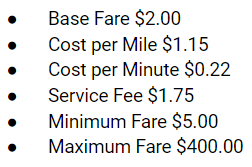

There are certain factors which affect the ltv of an uber drive. The total ride distance is the primary factor which affects the ltv most than the total ride time affects the ltv of uber driver.

# **Average Projected lifetime of a driver**

In [22]:
temp = ride_info.groupby('driver_id')['requested_at'].max().to_frame()
temp

,requested_at
driver_id,
002be0ffdc997bd5c50703158b7c2491,2016-06-23 10:06:26
007f0389f9c7b03ef97098422f902e62,2016-06-22 13:17:40
011e5c5dfc5c2c92501b8b24d47509bc,2016-06-12 20:22:22
0152a2f305e71d26cc964f8d4411add9,2016-06-26 10:16:37
01674381af7edd264113d4e6ed55ecda,2016-06-24 13:03:37
...,...
ff419a3476e21e269e340b5f1f05414e,2016-06-26 17:58:16
ff714a67ba8c6a108261cd81e3b77f3a,2016-06-17 09:18:58
fff482c704d36a1afe8b8978d5486283,2016-05-12 16:08:35


In [23]:
temp['last_date'] = temp['requested_at'].dt.date
temp

,requested_at,last_date
driver_id,,
002be0ffdc997bd5c50703158b7c2491,2016-06-23 10:06:26,2016-06-23
007f0389f9c7b03ef97098422f902e62,2016-06-22 13:17:40,2016-06-22
011e5c5dfc5c2c92501b8b24d47509bc,2016-06-12 20:22:22,2016-06-12
0152a2f305e71d26cc964f8d4411add9,2016-06-26 10:16:37,2016-06-26
01674381af7edd264113d4e6ed55ecda,2016-06-24 13:03:37,2016-06-24
...,...,...
ff419a3476e21e269e340b5f1f05414e,2016-06-26 17:58:16,2016-06-26
ff714a67ba8c6a108261cd81e3b77f3a,2016-06-17 09:18:58,2016-06-17
fff482c704d36a1afe8b8978d5486283,2016-05-12 16:08:35,2016-05-12


In [24]:
lifetime = pd.merge(driver_id, temp, on = 'driver_id')
lifetime.set_index('driver_id', inplace = True)
lifetime

,driver_onboard_date,requested_at,last_date
driver_id,,,
002be0ffdc997bd5c50703158b7c2491,2016-03-29 00:00:00,2016-06-23 10:06:26,2016-06-23
007f0389f9c7b03ef97098422f902e62,2016-03-29 00:00:00,2016-06-22 13:17:40,2016-06-22
011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05 00:00:00,2016-06-12 20:22:22,2016-06-12
0152a2f305e71d26cc964f8d4411add9,2016-04-23 00:00:00,2016-06-26 10:16:37,2016-06-26
01674381af7edd264113d4e6ed55ecda,2016-04-29 00:00:00,2016-06-24 13:03:37,2016-06-24
...,...,...,...
ff419a3476e21e269e340b5f1f05414e,2016-04-26 00:00:00,2016-06-26 17:58:16,2016-06-26
ff714a67ba8c6a108261cd81e3b77f3a,2016-03-28 00:00:00,2016-06-17 09:18:58,2016-06-17
fff482c704d36a1afe8b8978d5486283,2016-04-08 00:00:00,2016-05-12 16:08:35,2016-05-12


In [25]:
# changing the data type of driver_onboard_date to datetime

driver_id['driver_onboard_date'] = pd.to_datetime(driver_id['driver_onboard_date'], format = '%Y-%m-%d %H:%M:%S').dt.date
driver_id

,driver_id,driver_onboard_date
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29
1,007f0389f9c7b03ef97098422f902e62,2016-03-29
2,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05
3,0152a2f305e71d26cc964f8d4411add9,2016-04-23
4,01674381af7edd264113d4e6ed55ecda,2016-04-29
...,...,...
932,ff419a3476e21e269e340b5f1f05414e,2016-04-26
933,ff714a67ba8c6a108261cd81e3b77f3a,2016-03-28
934,fff482c704d36a1afe8b8978d5486283,2016-04-08
935,fffecccc49436c5389075b13209f0dfa,2016-05-06


In [26]:
# joing the driver_id table with temp table

lifetime = pd.merge(driver_id, temp, on = 'driver_id', how = 'right')[['driver_id','driver_onboard_date','last_date']]
lifetime.set_index('driver_id', inplace = True)
lifetime

,driver_onboard_date,last_date
driver_id,,
002be0ffdc997bd5c50703158b7c2491,2016-03-29,2016-06-23
007f0389f9c7b03ef97098422f902e62,2016-03-29,2016-06-22
011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05,2016-06-12
0152a2f305e71d26cc964f8d4411add9,2016-04-23,2016-06-26
01674381af7edd264113d4e6ed55ecda,2016-04-29,2016-06-24
...,...,...
ff419a3476e21e269e340b5f1f05414e,2016-04-26,2016-06-26
ff714a67ba8c6a108261cd81e3b77f3a,2016-03-28,2016-06-17
fff482c704d36a1afe8b8978d5486283,2016-04-08,2016-05-12


In [27]:
# calculating avg lifetime in days

lifetime['avg_lifetime'] = lifetime['last_date'] - lifetime['driver_onboard_date']
lifetime

,driver_onboard_date,last_date,avg_lifetime
driver_id,,,
002be0ffdc997bd5c50703158b7c2491,2016-03-29,2016-06-23,86 days
007f0389f9c7b03ef97098422f902e62,2016-03-29,2016-06-22,85 days
011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05,2016-06-12,68 days
0152a2f305e71d26cc964f8d4411add9,2016-04-23,2016-06-26,64 days
01674381af7edd264113d4e6ed55ecda,2016-04-29,2016-06-24,56 days
...,...,...,...
ff419a3476e21e269e340b5f1f05414e,2016-04-26,2016-06-26,61 days
ff714a67ba8c6a108261cd81e3b77f3a,2016-03-28,2016-06-17,81 days
fff482c704d36a1afe8b8978d5486283,2016-04-08,2016-05-12,34 days


In [28]:
# avg lifetime of uber drivers

lifetime['avg_lifetime'].mean()

Timedelta('55 days 01:48:23.225806452')

Average lifetime of an uber driver is 55 days.

# **Do all drivers act alike? Are there specific segments of drivers that generate more value for Uber than the average driver?**

In [32]:
ride_info

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,accepted_at,arrived_at,dropped_off_at,picked_up_at,requested_at,ride_dist_in_mile,ride_duration_in_minute,payment_received,final_payment,acceptance_time,ride_length,driver_onboard_date,last_date,avg_lifetime
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,2016-04-23 02:14:15,2016-04-23 02:16:36,2016-04-23 02:22:07,2016-04-23 02:16:40,2016-04-23 02:13:50,1.125303,5.450000,6.243098,6.243098,25.0,short_ride,2016-03-29,2016-06-23,86 days
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,2016-03-29 19:00:52,2016-03-29 19:03:57,2016-03-29 19:17:30,2016-03-29 19:04:01,2016-03-29 19:00:49,2.089049,13.483333,9.118740,9.118740,3.0,med_ride,2016-03-29,2016-06-23,86 days
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,2016-06-21 11:56:39,2016-06-21 12:01:32,2016-06-21 12:11:07,2016-06-21 12:01:35,2016-06-21 11:56:31,2.039340,9.533333,8.192574,8.192574,8.0,med_ride,2016-03-29,2016-06-23,86 days
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25,2016-05-19 09:15:33,2016-05-19 09:18:20,2016-05-19 10:13:58,2016-05-19 09:18:20,2016-05-19 09:15:29,40.564963,55.633333,62.639041,62.639041,4.0,long_ride,2016-03-29,2016-06-23,86 days
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100,2016-04-20 22:05:32,2016-04-20 22:07:03,2016-04-20 22:20:45,2016-04-20 22:07:02,2016-04-20 22:05:30,2.556942,13.716667,9.708150,9.708150,2.0,med_ride,2016-03-29,2016-06-23,86 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184814,ffff51a71f2f185ec5e97d59dbcd7a78,fc717192b3512767269ff5a54b97af05,10127,1336,0,2016-06-18 01:15:52,2016-06-18 01:21:11,2016-06-18 01:43:30,2016-06-18 01:21:14,2016-06-18 01:14:52,6.292624,22.266667,15.885184,15.885184,60.0,long_ride,2016-05-04,2016-06-26,53 days
184815,ffff51a71f2f185ec5e97d59dbcd7a78,fd6fa5f9265d2cf83936ead663f9e0e7,1908,445,0,2016-06-23 23:52:08,2016-06-23 23:59:04,2016-06-24 00:06:33,2016-06-23 23:59:08,2016-06-23 23:51:55,1.185576,7.416667,6.745079,6.745079,13.0,short_ride,2016-05-04,2016-06-26,53 days
184816,ffff51a71f2f185ec5e97d59dbcd7a78,fe0857c43025264d337dfe1d8463e503,4039,875,0,2016-05-31 19:26:42,2016-05-31 19:29:08,2016-05-31 19:43:46,2016-05-31 19:29:11,2016-05-31 19:26:34,2.509717,14.583333,9.844508,9.844508,8.0,med_ride,2016-05-04,2016-06-26,53 days
184817,ffff51a71f2f185ec5e97d59dbcd7a78,ff0db0ca4557bf5b05b4da6f660a1ac1,4760,777,0,2016-05-15 00:51:59,2016-05-15 00:52:05,2016-05-15 01:05:04,2016-05-15 00:52:07,2016-05-15 00:51:53,2.957726,12.950000,10.000385,10.000385,6.0,med_ride,2016-05-04,2016-06-26,53 days


In [33]:
ride_agg = ride_info.groupby('driver_id')['ride_duration_in_minute','ride_prime_time','ride_dist_in_mile','final_payment'].sum()
ride_agg

<ipython-input-33-8083cb13b56b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ride_agg = ride_info.groupby('driver_id')['ride_duration_in_minute','ride_prime_time','ride_dist_in_mile','final_payment'].sum()


,ride_duration_in_minute,ride_prime_time,ride_dist_in_mile,final_payment
driver_id,,,,
002be0ffdc997bd5c50703158b7c2491,3687.300000,5375,1081.363873,3093.524454
007f0389f9c7b03ef97098422f902e62,341.616667,625,73.030355,275.390575
011e5c5dfc5c2c92501b8b24d47509bc,486.750000,675,167.554554,427.272737
0152a2f305e71d26cc964f8d4411add9,2908.683333,2050,914.185249,2407.473369
01674381af7edd264113d4e6ed55ecda,5957.383333,4700,1940.941796,4948.957399
...,...,...,...,...
ff419a3476e21e269e340b5f1f05414e,4105.133333,3100,1244.233290,3241.497617
ff714a67ba8c6a108261cd81e3b77f3a,7374.866667,8625,1761.440763,5466.877544
fff482c704d36a1afe8b8978d5486283,461.550000,175,108.363374,357.408880


In [34]:
ride_agg.sort_values(by = ['ride_dist_in_mile'], ascending = False)

,ride_duration_in_minute,ride_prime_time,ride_dist_in_mile,final_payment
driver_id,,,,
c12c2eb875879488e687111335a12805,7901.350000,7825,4118.571884,8195.904666
5ccc0e6dc9c7475caf785cdce7b8eb7a,12473.066667,16650,3947.665033,10730.139454
c07499b5a6f1090f2fb263ec6ac0660c,10011.366667,8050,3840.018721,8951.022195
3788dc9e91f1548816ce8b5af07ddadc,12996.616667,18100,3834.001985,10204.607950
7c27405cefee2fad79a81a819ca9dbe1,7264.366667,3925,3679.449619,7610.777729
...,...,...,...,...
07e6a2fdaadc640cca9a7bec41351065,253.783333,375,65.914414,214.133910
d31eded9263eab43f614eecc6a52a0f5,237.833333,225,58.817115,191.213015
fd831ca1d79ae5c6fc3a679a22e5b8cf,210.316667,400,47.201205,171.801053


In [35]:
ride_agg.sort_values(by = ['final_payment'], ascending = False).corr()

,ride_duration_in_minute,ride_prime_time,ride_dist_in_mile,final_payment
ride_duration_in_minute,1.000000,0.911519,0.962431,0.993323
ride_prime_time,0.911519,1.000000,0.831663,0.892508
ride_dist_in_mile,0.962431,0.831663,1.000000,0.984632
final_payment,0.993323,0.892508,0.984632,1.000000


# **What actionable recommendations are there for the business?**



*   The behavior of driver are to be noted. There are certain drivers with a good amount of rides. These driver needs to be appriciated.
*   The non performing drivers need be observed and trained properly in order to boost their performance.
*   A better way is to conduct a survey of the customer satisfaction. Which is a very much important factor for good driver rating.



